In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Uploading the dataset, Data set is collected from Kaggle,

In [ ]:
df =  pd.read_csv("loan_approval_dataset.csv")

In [ ]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

No null values were found in the dataset.

In [ ]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

There are 3 categorical and 10 numerical columns.

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

there is additional space in the column names.


---

Removing extraspce from column names

In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [ ]:
df['loan_status'].value_counts()


loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

there is about 60 to 40 percentage ratio. it is not considerd as imbalance dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
df['education'] = label_encoder.fit_transform(df['education'])

# Apply label encoding to the 'self_employed' column
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])


# Display the updated DataFrame with encoded columns
print(df[['education', 'self_employed']])

      education  self_employed
0             0              0
1             1              1
2             0              0
3             0              0
4             1              1
...         ...            ...
4264          0              1
4265          1              1
4266          1              0
4267          1              0
4268          0              0

[4269 rows x 2 columns]


In [ ]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                    int64
self_employed                int64
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

there is total 4269 rows in this dataset with 13 column. And out of total database 2656 instances are for approved which is around (62.2 % of whole data). The dataset is slightly imbalanced but it is acceptable and we don't need to rebalance it.

In [ ]:
df = df.drop(['loan_id'], axis=1)

In [ ]:
df


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
df.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,0.497775,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,0.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


EDA



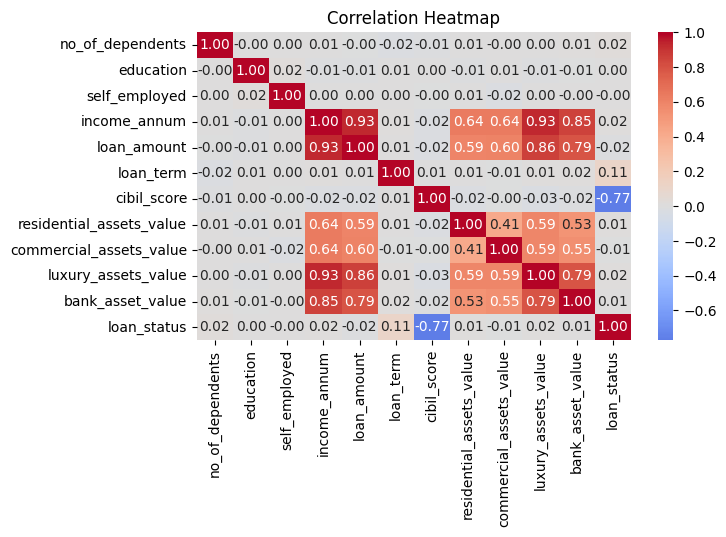

In [ ]:
correlation_matrix = df
correlation_matrix['loan_status'] = label_encoder.fit_transform(df['loan_status'])
correlation_matrix = df.corr(numeric_only=True)

# Creating heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', center=0, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

It can be understood from above correlation diagram

---
we can see that there is a strong corelation between (**loan_amount and income_annum,** ) (**income_annum and luxury_asset_value**) (**luxury_assets_value and income_annum**)



# 1. **analysing the loan status on loan amount and Annual Income** ( Income is one of the factore that afect the loan )

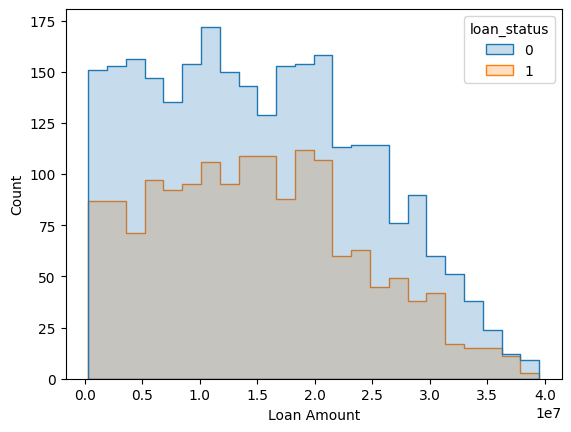

In [ ]:
sns.histplot(data=df, x='loan_amount', hue="loan_status", element="step")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

almost everywhere loan status have same trends .

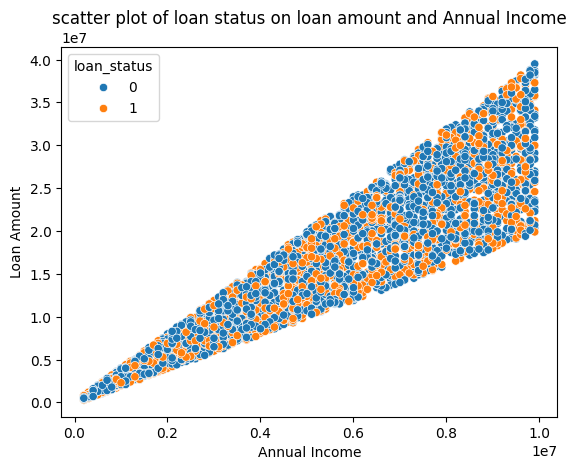

In [ ]:
sns.scatterplot(x=df['income_annum'], y= df['loan_amount'], hue=df["loan_status"])
plt.title("scatter plot of loan status on loan amount and Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

this is intersting,

---


1.   we can see from diagram when the income is incresing the loan amount also increases.
2.   there is no trend for loan status, event For the highest income person have both rejected and approved loan status




In [ ]:
df.loc[(df['income_annum'] == df['income_annum'].max()) & (df['loan_status'] ==' Rejected')]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


we can see from the list that even the income is high but there cibil score is low.


2. **CIBIL SCORE**

In [ ]:
def cibil_rating(value):
    if 300 <= value <= 579:
        return "Poor"
    elif 580 <= value <= 669:
        return "Fair"
    elif 670 <= value <= 739:
        return "Good"
    elif 740 <= value <= 799:
        return "Very good"
    elif 800 <= value <= 900:
        return "Excellent"

df['CIBIL_rating'] = df['cibil_score'].apply(cibil_rating)

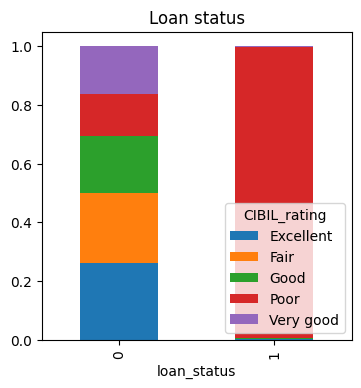

In [ ]:
cibil_rating = pd.crosstab(df['loan_status'], df['CIBIL_rating'])
cibil_rating.div(cibil_rating.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.title('Loan status')
plt.show()

it is seen that ***all almomst all the poor cibil score got rejected***. there are some which got approved. whereas ***all the fair , good, very good and Excellent got approved***

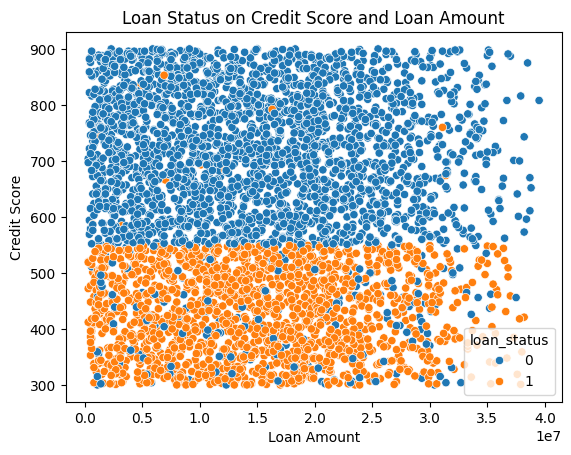

In [ ]:
sns.scatterplot(x=df['loan_amount'], y=df['cibil_score'], hue=df['loan_status'])
plt.title("Loan Status on Credit Score and Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Credit Score")
plt.show()

it can seen from the graph that above around 550 there is a good chance of loan approving.

---

but there still some which got rejected even there score is higher then 550

3. **EDA on assets now**

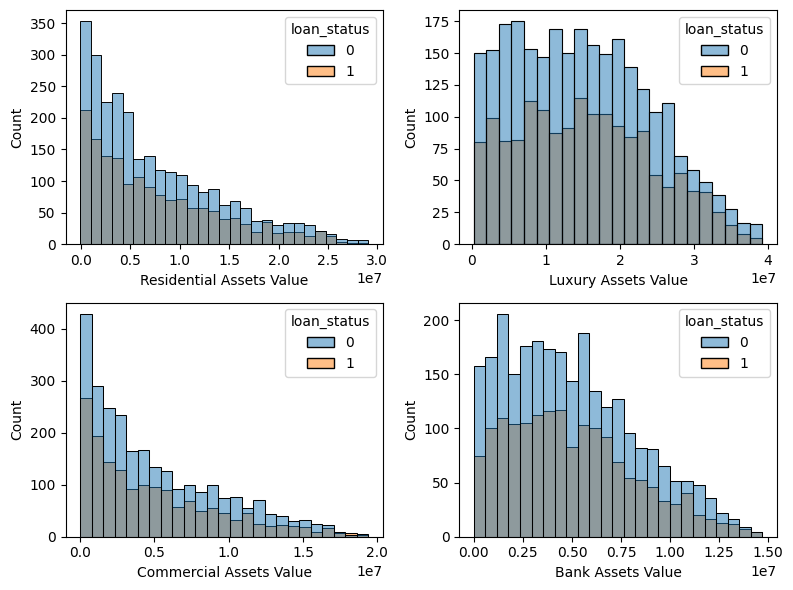

In [ ]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.histplot(df, x = 'residential_assets_value', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(df, x = 'commercial_assets_value', hue = 'loan_status', ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
axes[1,0].set_ylabel("Count")

sns.histplot(df, x = 'luxury_assets_value', hue = 'loan_status', ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")
axes[0,1].set_ylabel("Count")

sns.histplot(df, x = 'bank_asset_value', hue = 'loan_status', ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

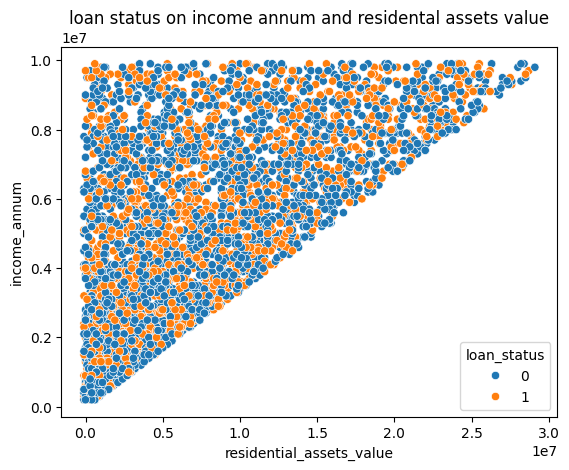

In [ ]:
sns.scatterplot(df, x='residential_assets_value', y='income_annum', hue='loan_status')
plt.title('loan status on income annum and residental assets value')
plt.show()


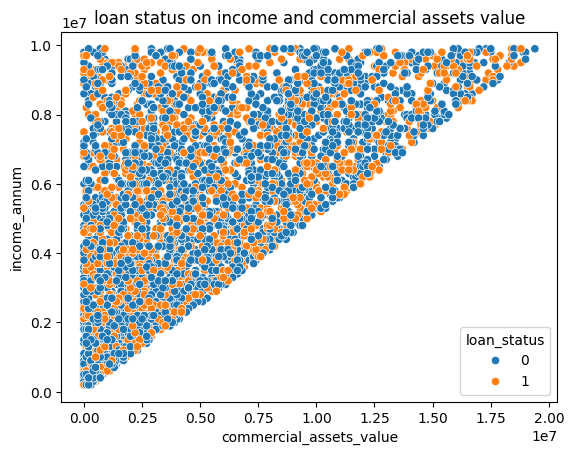

In [ ]:
sns.scatterplot(df, x='commercial_assets_value', y='income_annum', hue='loan_status')
plt.title('loan status on income and commercial assets value')
plt.show()

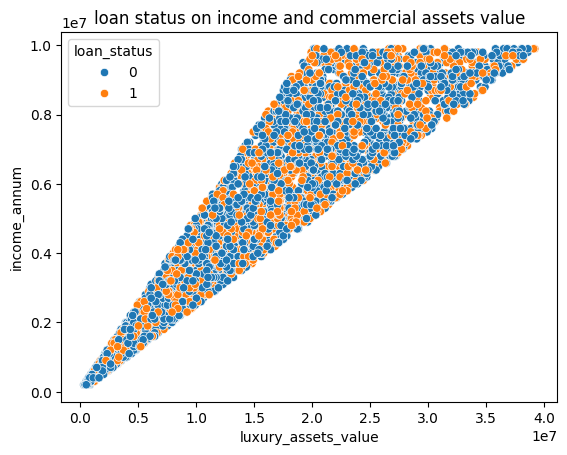

In [ ]:
sns.scatterplot(df, x='luxury_assets_value', y='income_annum', hue='loan_status')
plt.title('loan status on income and commercial assets value')
plt.show()

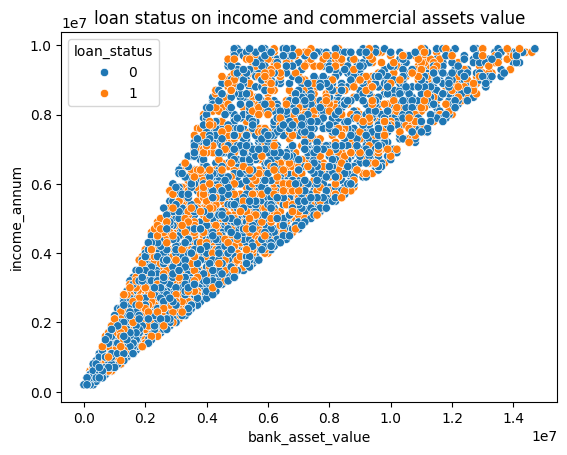

In [ ]:
sns.scatterplot(df, x='bank_asset_value', y='income_annum', hue='loan_status')
plt.title('loan status on income and commercial assets value')
plt.show()

1. FOR commercial and residents assets: we can see the right angle triangle angle, even people with high salary has no commercial and resident assests.
2. FOR luxury and bank assests: when there is high income people tendes to more luxury and bank assets.


trying to explore the assets of rejected case for cibil score more then 540

In [ ]:
cases_above_low=df.loc[(df['cibil_score'] >= 579)]
cases_above_low

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL_rating
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,Very good
6,5,0,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,0,Good
8,0,0,1,800000,2200000,20,782,1300000,800000,2800000,600000,0,Very good
13,2,0,1,9100000,31500000,14,679,10800000,16600000,20900000,5000000,0,Good
15,5,1,0,4700000,10700000,10,794,5700000,3900000,16400000,4400000,0,Very good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,5,0,1,7000000,26200000,12,896,13100000,6600000,23600000,5700000,0,Excellent
4261,3,0,1,3000000,7500000,6,881,1400000,4500000,6100000,2300000,0,Excellent
4263,3,0,0,5000000,12700000,14,865,4700000,8100000,19500000,6300000,0,Excellent
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,Very good


we can see from graph that people who has less resident assets even the score is above low, got rejection.

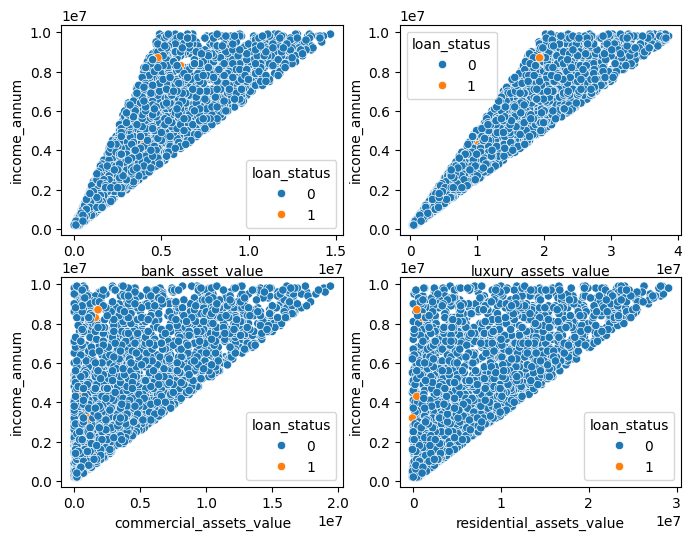

In [ ]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))
sns.scatterplot(cases_above_low, x='bank_asset_value', y='income_annum', hue='loan_status', ax=axes[0,0])
axes[0,0].set_xlabel('bank_asset_value')

sns.scatterplot(cases_above_low, x='luxury_assets_value', y='income_annum', hue='loan_status', ax=axes[0,1])
axes[0,1].set_xlabel('luxury_assets_value')

sns.scatterplot(cases_above_low, x='commercial_assets_value', y='income_annum', hue='loan_status', ax=axes[1,0])
axes[1,0].set_xlabel('commercial_assets_value')

sns.scatterplot(cases_above_low, x='residential_assets_value', y='income_annum', hue='loan_status', ax=axes[1, 1])
axes[1,1].set_xlabel('residential_assets_value')

plt.show()

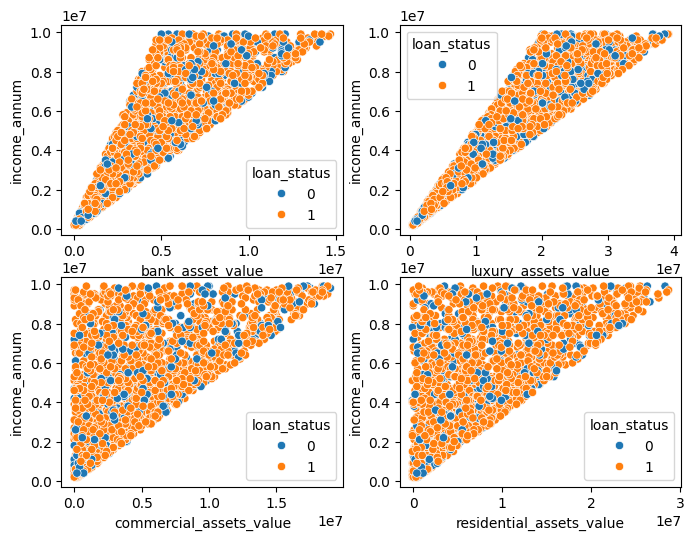

In [ ]:
cases_below_low=df.loc[(df['cibil_score'] <= 579)]
cases_below_low

fig,axes = plt.subplots(2, 2, figsize = (8, 6))
sns.scatterplot(cases_below_low, x='bank_asset_value', y='income_annum', hue='loan_status', ax=axes[0,0])
axes[0,0].set_xlabel('bank_asset_value')

sns.scatterplot(cases_below_low, x='luxury_assets_value', y='income_annum', hue='loan_status', ax=axes[0,1])
axes[0,1].set_xlabel('luxury_assets_value')

sns.scatterplot(cases_below_low, x='commercial_assets_value', y='income_annum', hue='loan_status', ax=axes[1,0])
axes[1,0].set_xlabel('commercial_assets_value')

sns.scatterplot(cases_below_low, x='residential_assets_value', y='income_annum', hue='loan_status', ax=axes[1, 1])
axes[1,1].set_xlabel('residential_assets_value')

plt.show()

4. **lets check the loan term**

In [ ]:
df.loc[(df['loan_term'] <=4) & (df['loan_status'] ==' Rejected')].sort_values(['loan_amount'])


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL_rating


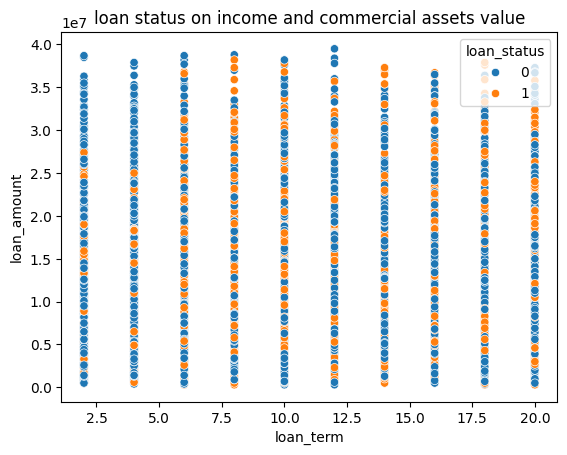

In [ ]:
sns.scatterplot(df, x='loan_term', y='loan_amount', hue='loan_status')
plt.title('loan status on income and commercial assets value')
plt.show()

as such no relation is visible in loan tenure




5. **EDA on the number of the dependents**

<Axes: xlabel='no_of_dependents', ylabel='count'>

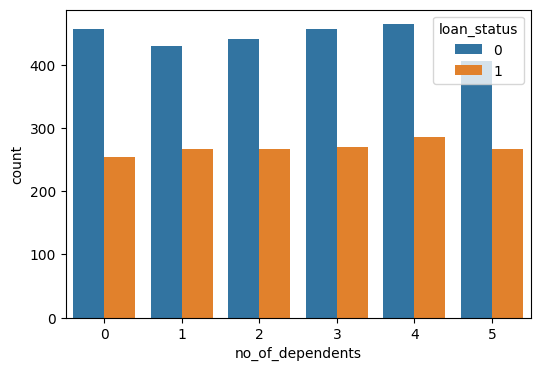

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(df, x='no_of_dependents', hue='loan_status')

no obvios trebds found. it is much linear.

6. **EDA on the education and loan status**

Text(0.5, 1.0, 'counts for education')

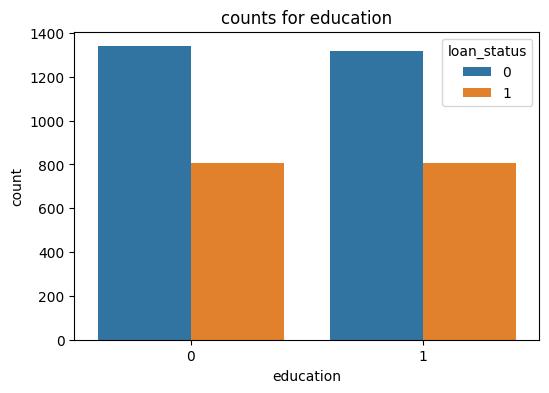

In [ ]:
plt.figure(figsize = (6, 4))
sns.countplot(df, x='education', hue='loan_status')
plt.xlabel('education')
plt.title('counts for education')

7. **Self Employee**

Text(0.5, 1.0, 'counts for Self Employed')

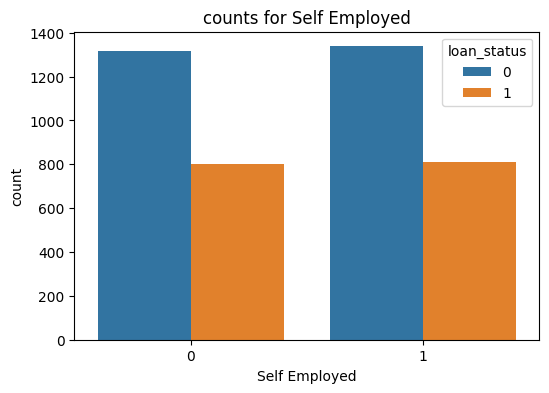

In [ ]:
plt.figure(figsize = (6, 4))
sns.countplot(df, x='self_employed', hue='loan_status')
plt.xlabel('Self Employed')
plt.title('counts for Self Employed')

In [ ]:
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL_rating
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,Very good
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,Poor
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,Poor
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,Poor
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1,Poor
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,Poor
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,Poor
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,Very good


The counts based on different education status are approximately the same, No obvios relation found



---


Traniing on Model,

---

Removing removing loan status and cibil rating for X

In [ ]:
X = df.drop(columns=['loan_status', 'CIBIL_rating'])
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


assiging target values to y

In [ ]:
y= df['loan_status']
y


0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
scores = []
names = []


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


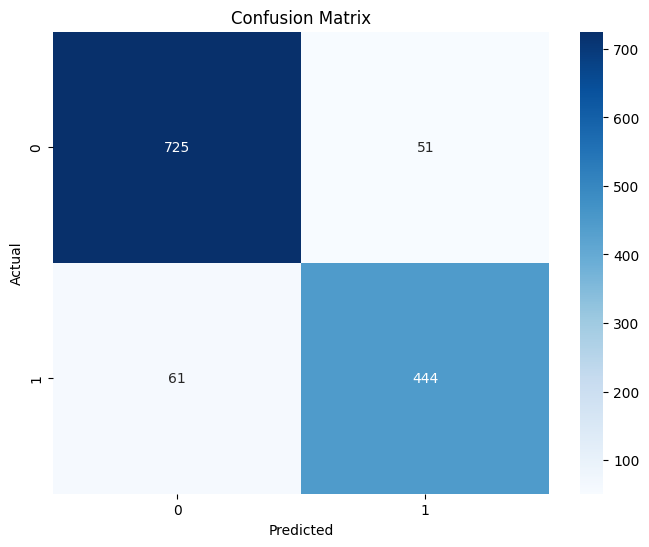

Accuracy: 0.912568306010929
Precision: 0.9123698504251626
Recall: 0.912568306010929
F1 Score: 0.912411018520462
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       776
           1       0.90      0.88      0.89       505

    accuracy                           0.91      1281
   macro avg       0.91      0.91      0.91      1281
weighted avg       0.91      0.91      0.91      1281



In [ ]:
names.append("LR")
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression(random_state=42).fit(X_train_scaled, y_train)
log_reg_score = log_reg.score(X_test, y_test)


# Application of model to a new dataset
log_reg_score = log_reg.score(X_test_scaled, y_test)
scores.append(log_reg_score)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

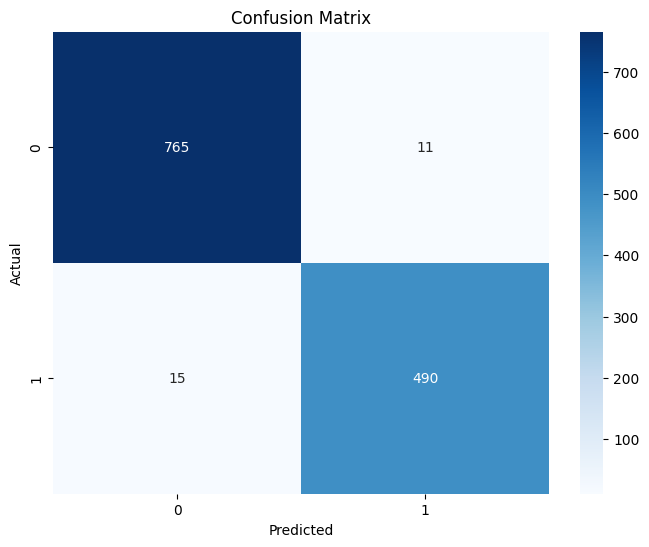

Accuracy: 0.9797033567525371
Precision: 0.979694846780348
Recall: 0.9797033567525371
F1 Score: 0.9796890938035139
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       776
           1       0.98      0.97      0.97       505

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [ ]:
clf = RandomForestClassifier()
names.append("RF")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)


# Predict on the test set
y_pred = clf.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklea

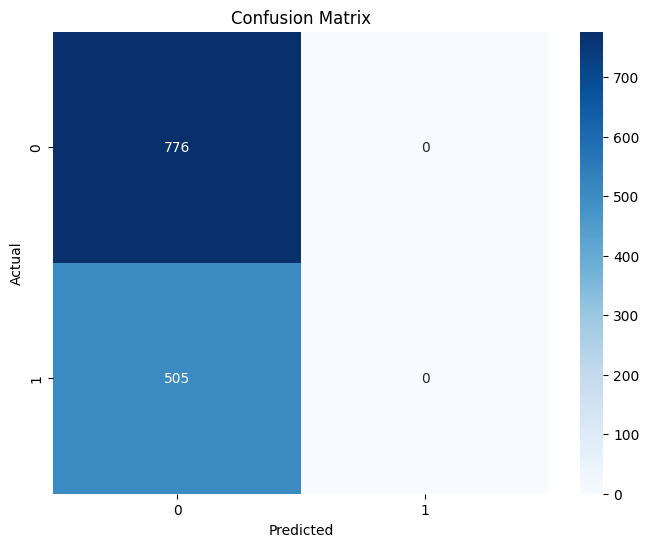

Accuracy: 0.6057767369242779
Precision: 0.3669654549986258
Recall: 0.6057767369242779
F1 Score: 0.4570566337902185
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.75       776
           1       0.00      0.00      0.00       505

    accuracy                           0.61      1281
   macro avg       0.30      0.50      0.38      1281
weighted avg       0.37      0.61      0.46      1281



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
names.append("DT")
dtc.fit(X_train_scaled, y_train)
y_pred_dt = dtc.predict(X_test)
score = accuracy_score(y_test, y_pred_dt)
scores.append(score)


# Predict on the test set
y_pred = dtc.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

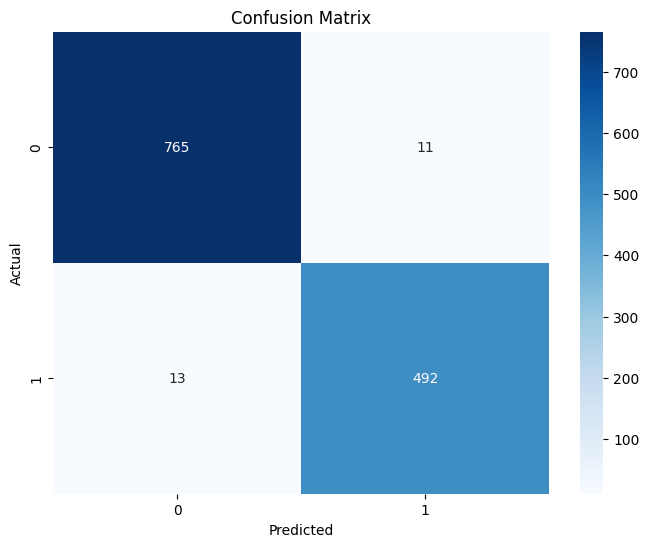

Accuracy: 0.9812646370023419
Precision: 0.9812565819270755
Recall: 0.9812646370023419
F1 Score: 0.9812581065508467
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       776
           1       0.98      0.97      0.98       505

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [ ]:
from xgboost import XGBClassifier

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier()
names.append("XG BOOST")

# Train the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)
score = accuracy_score(y_test, y_pred_xgb)
scores.append(score)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [ ]:
names, scores

(['LR', 'RF', 'DT', 'XG BOOST'],
 [0.912568306010929,
  0.9797033567525371,
  0.6057767369242779,
  0.9812646370023419])

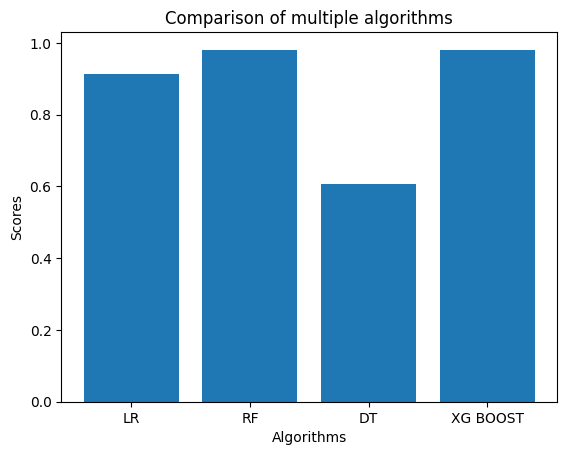

In [ ]:
plt.bar(names, scores)
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.title("Comparison of multiple algorithms")
plt.show()